# H2O model interpretation
Needs to be executed with 
srun --pty -A fc_keenan -p savio -t 00:10:00 papermill 03_h2o_explainability.ipynb 03_h2o_explainability_out.ipynb

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import h2o
from models.h2o import H2o
import os
import glob
from modules.analysis import *
import numpy as np

In [2]:
# loads model paths and exp_ids
reps = list(range(0, 30))

exp_id = '2022110113578590'

models = []
exp_paths = []
h2o.init()

for rep in reps:
    exp_path = os.path.join('experiments', exp_id + '_' + str(rep))
    exp_paths.append(exp_path)
    print(exp_path)
    models.append(H2o.load(os.path.join(exp_path, 'fold_0'), init=False))

Checking whether there is an H2O instance running at http://localhost:54321 .

.

.

.

.

 not found.
Attempting to start a local H2O server...


  Java Version: [0.406s][warning][os,container] Duplicate cpuset controllers detected. Picking /sys/fs/cgroup/cpuset, skipping /cgroup/cpuset.; openjdk version "17.0.3-internal" 2022-04-19; OpenJDK Runtime Environment (build 17.0.3-internal+0-adhoc..src); OpenJDK 64-Bit Server VM (build 17.0.3-internal+0-adhoc..src, mixed mode, sharing)
  Starting server from /global/scratch/users/maxgaber/envs/_h2o/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp87v6pu_t
  JVM stdout: /tmp/tmp87v6pu_t/h2o_maxgaber_started_from_python.out
  JVM stderr: /tmp/tmp87v6pu_t/h2o_maxgaber_started_from_python.err


  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ...

 successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/Los_Angeles
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.1
H2O_cluster_version_age:,1 month and 14 days
H2O_cluster_name:,H2O_from_python_maxgaber_mju9fb
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,15.62 Gb
H2O_cluster_total_cores:,20
H2O_cluster_allowed_cores:,20
H2O_cluster_status:,"locked, healthy"


experiments/2022110113578590_0


experiments/2022110113578590_1


experiments/2022110113578590_2


experiments/2022110113578590_3


experiments/2022110113578590_4
experiments/2022110113578590_5


experiments/2022110113578590_6


experiments/2022110113578590_7
experiments/2022110113578590_8


experiments/2022110113578590_9
experiments/2022110113578590_10


experiments/2022110113578590_11
experiments/2022110113578590_12


experiments/2022110113578590_13


experiments/2022110113578590_14
experiments/2022110113578590_15


experiments/2022110113578590_16


experiments/2022110113578590_17


experiments/2022110113578590_18
experiments/2022110113578590_19


experiments/2022110113578590_20


experiments/2022110113578590_21
experiments/2022110113578590_22


experiments/2022110113578590_23


experiments/2022110113578590_24


experiments/2022110113578590_25


experiments/2022110113578590_26


experiments/2022110113578590_27


experiments/2022110113578590_28


experiments/2022110113578590_29


In [3]:
# load base models
df_models = []
# loop over 30 bootrap models
for idx, bootstrap_model in enumerate(models):
    print(idx)
    path = glob.glob(os.path.join(exp_paths[idx], 'fold_0', '*_AutoML_*'))[0]
    
    # loop over base models
    base_models = []
    base_models_imp = []
    if 'base_models' in bootstrap_model.actual_params:
        
        # get metalearner
        base_model_imp = bootstrap_model.metalearner().varimp(use_pandas=True)
        base_model_imp = base_model_imp[['variable', 'percentage']]
        base_model_imp.columns = ['base_model', 'importance']
        base_models.append(base_model_imp)

    else:
        base_models.append(pd.DataFrame({'base_model': [path.split('/')[-1]], 'importance': [1]}))
        
    df_base_models = pd.concat(base_models)
    df_base_models['rep'] = reps[idx]
    df_base_models['path'] = path
    df_models.append(df_base_models)
    
df_models = pd.concat(df_models, ignore_index=True)
df_models['base_model_type'] = df_models['base_model'].str.split('_').str[0]
df_models['model_type'] = df_models['path'].str.split('/').str[-1].str.split('_').str[0:2].str.join(' ')
df_models

0


1
2
3
4
5
6
7
8


9
10
11
12
13
14
15
16
17
18


19
20
21
22
23
24


25
26
27
28
29


,base_model,importance,rep,path,base_model_type,model_type
0,DeepLearning_grid_1_AutoML_1_20221101_15158_mo...,0.260076,0,experiments/2022110113578590_0/fold_0/StackedE...,DeepLearning,StackedEnsemble AllModels
1,GBM_grid_1_AutoML_1_20221101_15158_model_10,0.192198,0,experiments/2022110113578590_0/fold_0/StackedE...,GBM,StackedEnsemble AllModels
2,DeepLearning_grid_1_AutoML_1_20221101_15158_mo...,0.146971,0,experiments/2022110113578590_0/fold_0/StackedE...,DeepLearning,StackedEnsemble AllModels
3,XGBoost_grid_1_AutoML_1_20221101_15158_model_44,0.126081,0,experiments/2022110113578590_0/fold_0/StackedE...,XGBoost,StackedEnsemble AllModels
4,XGBoost_grid_1_AutoML_1_20221101_15158_model_87,0.065218,0,experiments/2022110113578590_0/fold_0/StackedE...,XGBoost,StackedEnsemble AllModels
...,...,...,...,...,...,...
1546,DeepLearning_grid_3_AutoML_1_20221101_22414_mo...,0.000000,28,experiments/2022110113578590_28/fold_0/Stacked...,DeepLearning,StackedEnsemble AllModels
1547,DeepLearning_grid_2_AutoML_1_20221101_22414_mo...,0.000000,28,experiments/2022110113578590_28/fold_0/Stacked...,DeepLearning,StackedEnsemble AllModels
1548,DeepLearning_grid_1_AutoML_1_20221101_22414_mo...,0.000000,28,experiments/2022110113578590_28/fold_0/Stacked...,DeepLearning,StackedEnsemble AllModels
1549,DeepLearning_grid_3_AutoML_1_20221101_22414_mo...,0.000000,28,experiments/2022110113578590_28/fold_0/Stacked...,DeepLearning,StackedEnsemble AllModels


In [4]:
# create saving path
out_path = os.path.join('analysis/benchmark/', exp_id)
if not os.path.isdir(out_path):
    os.makedirs(out_path)

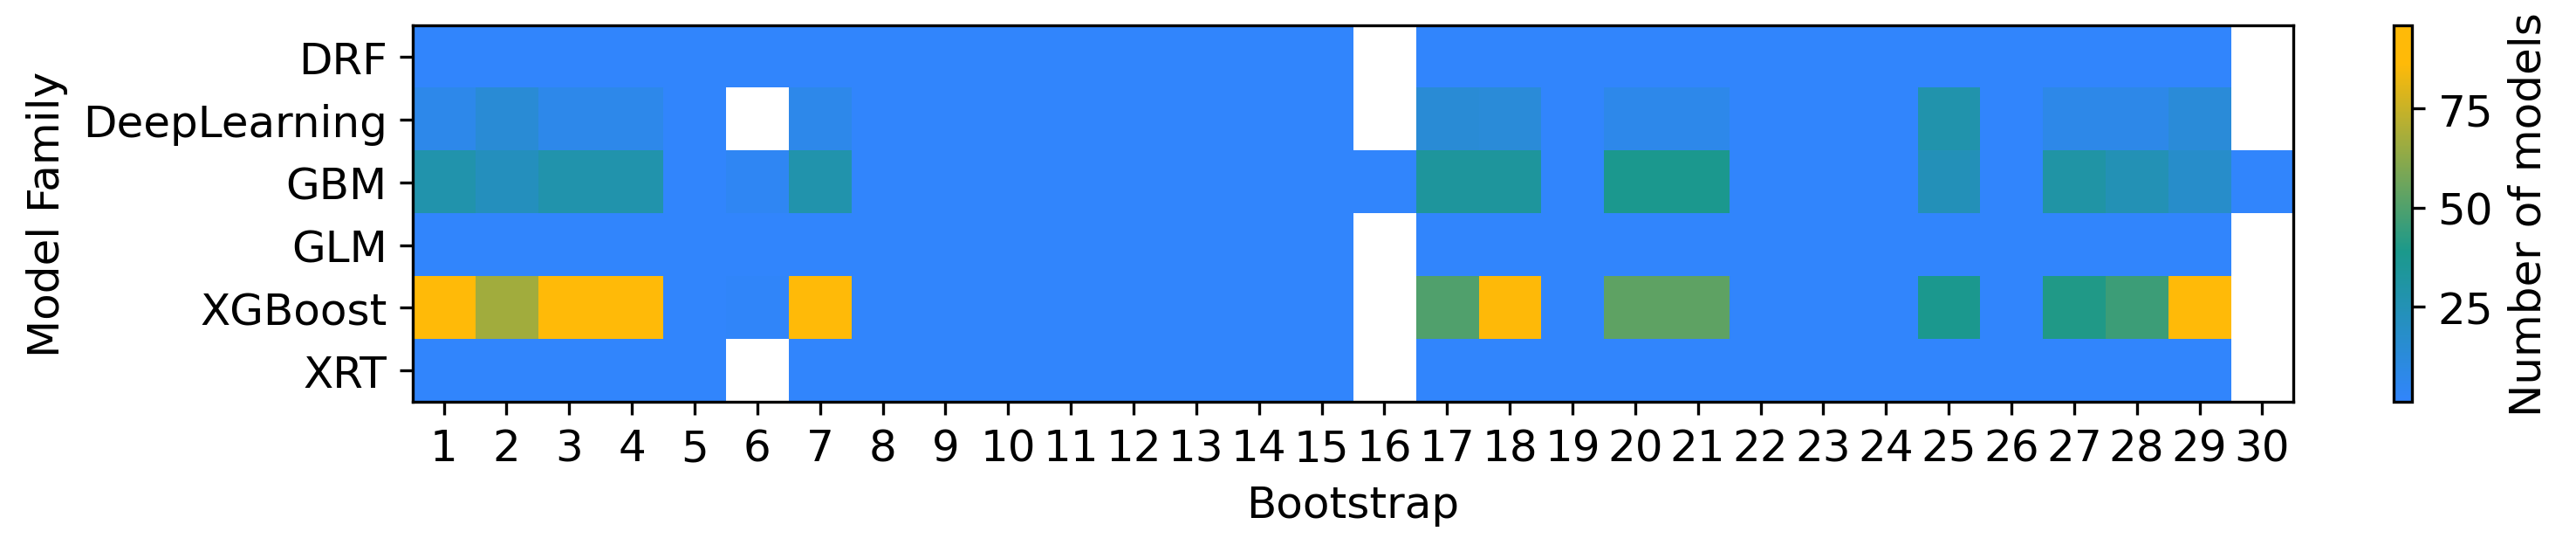

In [5]:
# plot model count matrix
cmat = df_models[['rep', 'base_model_type']].groupby('rep').value_counts().unstack(level=0, fill_value=0)
#cmat = cmat * 100 / cmat.sum()

fig = plt.figure(figsize=(10, 5))
ax = plt.axes()

cmat = cmat.where(cmat > 0, np.nan)

plt.imshow(cmat, cmap=cmap_gpp_1)
plt.yticks(np.arange(0, len(cmat.index), 1), cmat.index)
plt.xticks(np.arange(0, len(cmat.columns), 1), cmat.columns+1)
plt.xlabel('Bootstrap')
plt.ylabel('Model Family')

cbar = plt.colorbar(fraction=0.047*cmat.shape[0]/cmat.shape[1])
cbar.set_label('Number of models')

plt.tight_layout()
plt.savefig(os.path.join('analysis/benchmark', exp_id, 'base_model_count.pdf'))

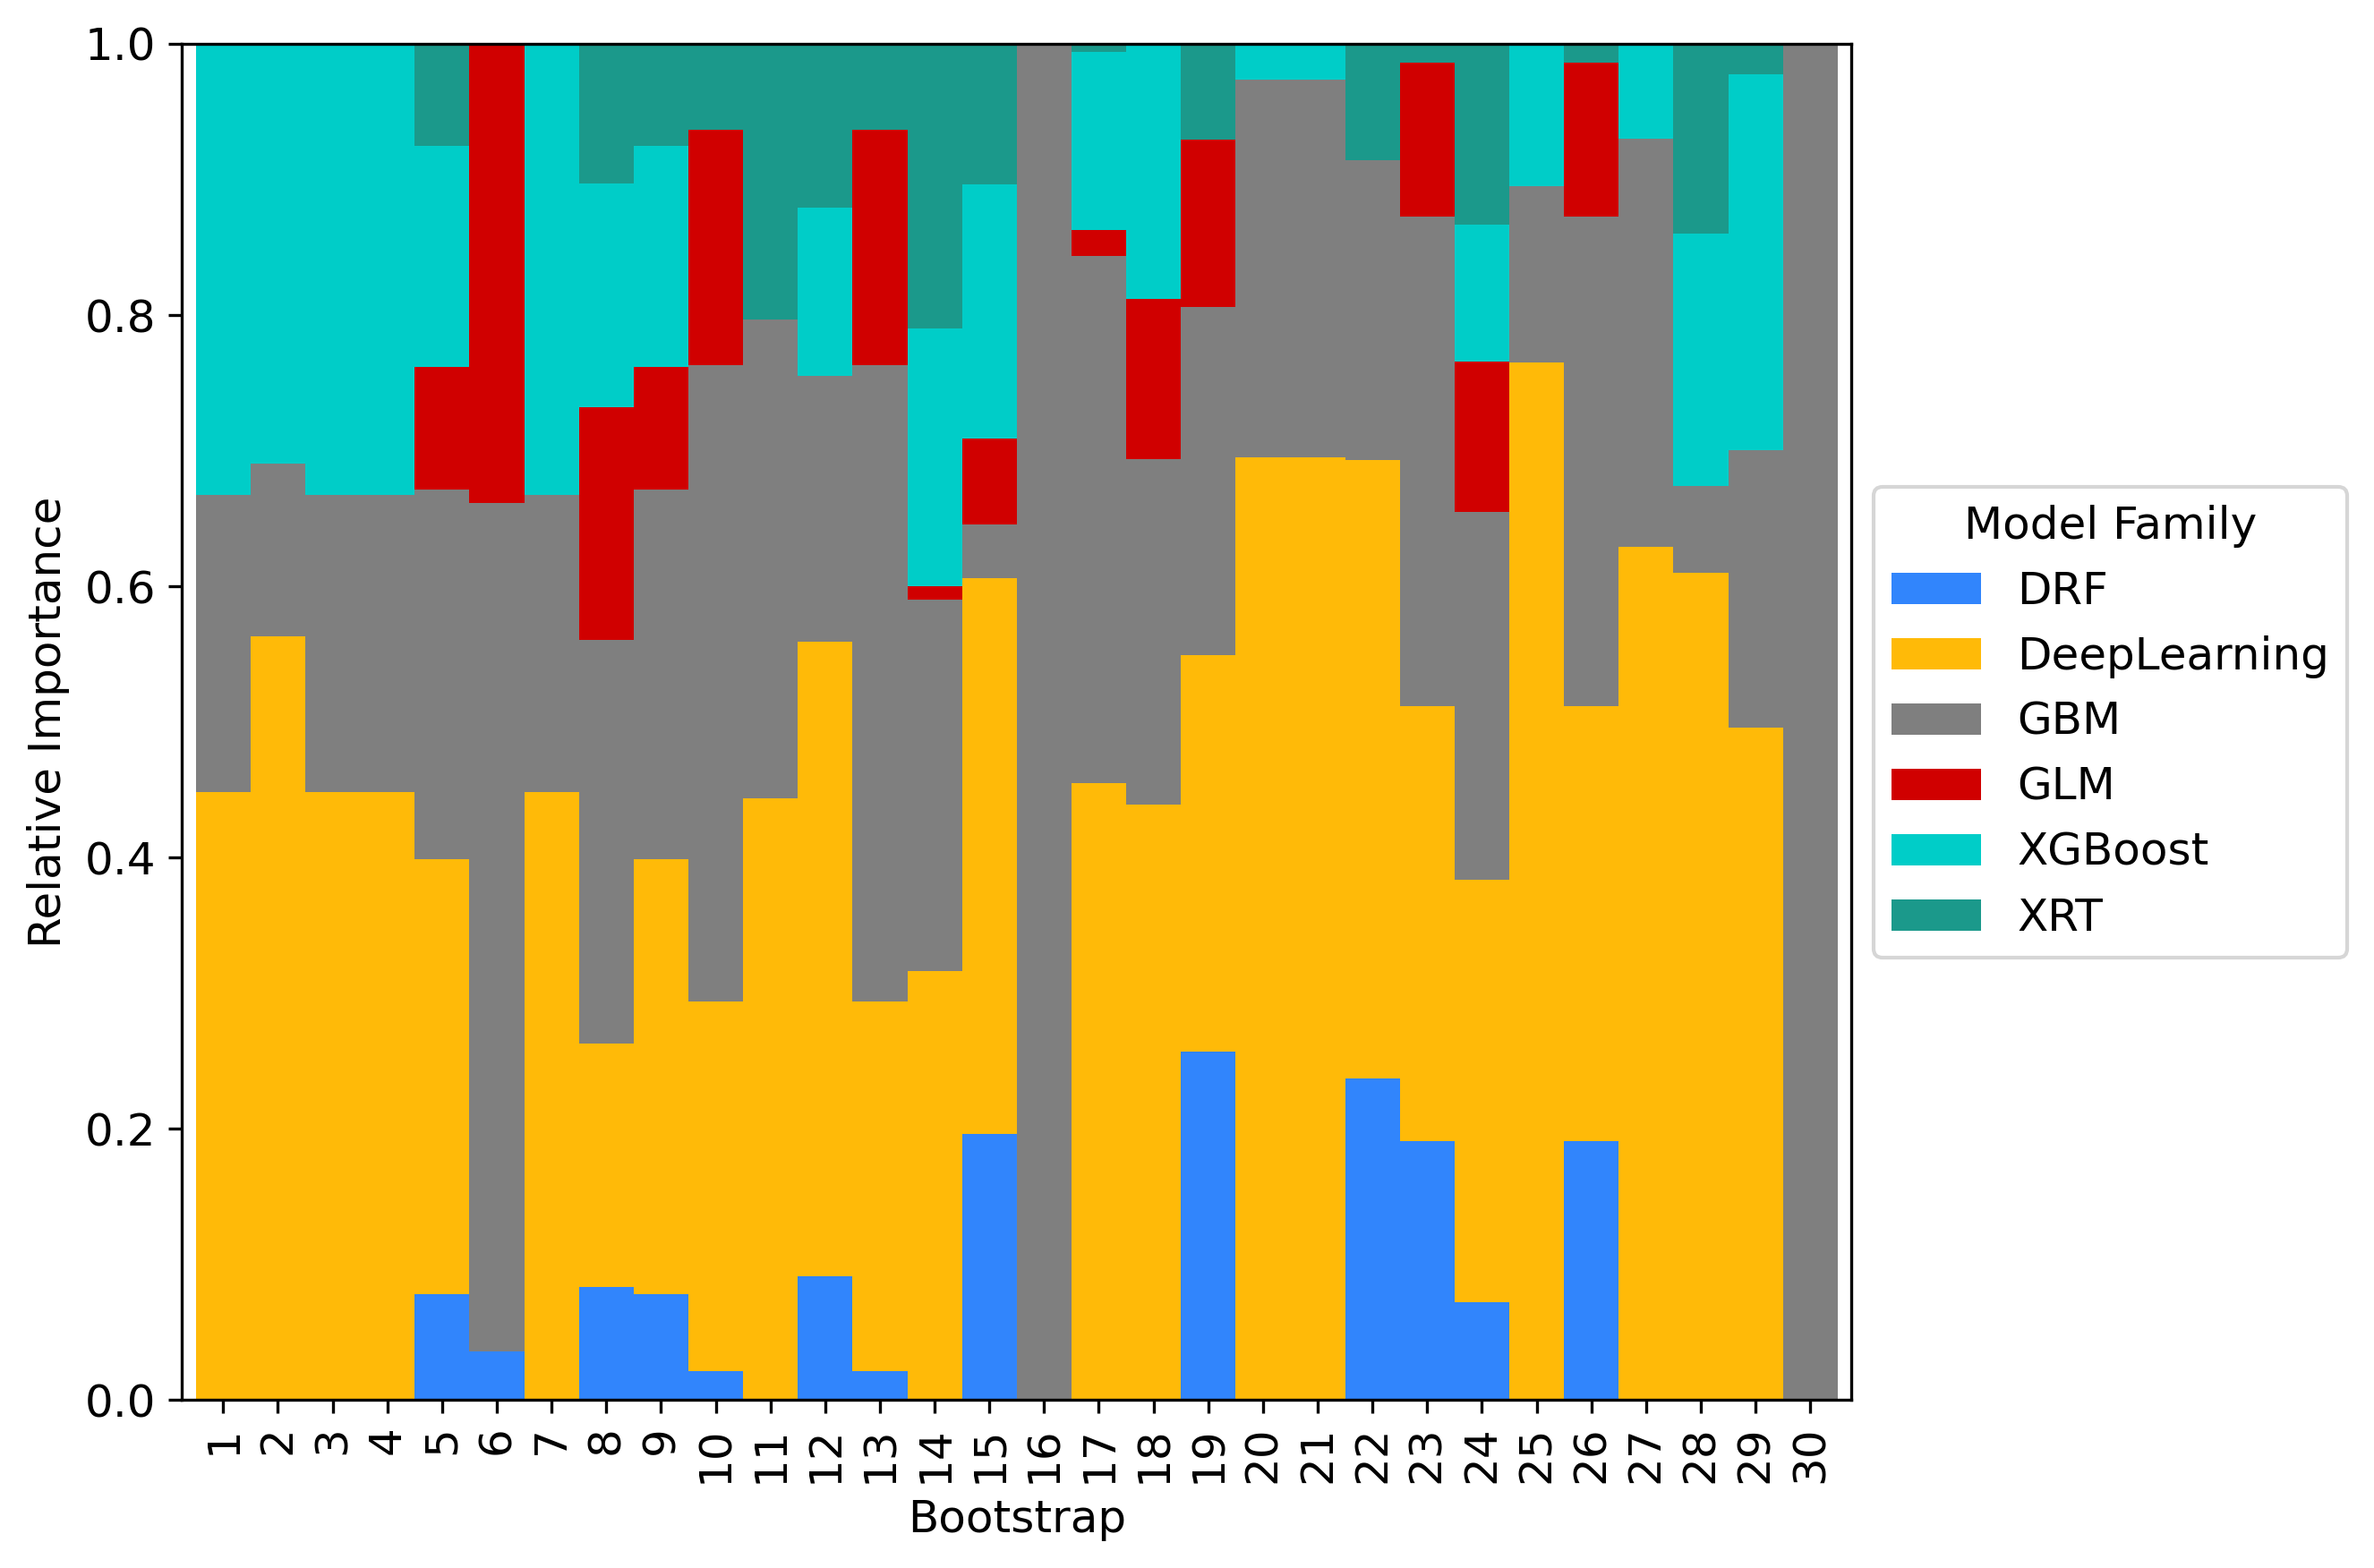

In [6]:
# plot model importance bar chart
model_imp = df_models.copy()
model_imp['rep'] = model_imp.rep + 1
model_imp = model_imp.groupby(['rep', 'base_model_type'])['importance'].sum().reset_index().fillna(0)

colors = plt.cm.Paired(np.linspace(0, 1, 6))

model_imp.set_index(['rep', 'base_model_type']).unstack('base_model_type').droplevel(0, axis=1).plot(kind='bar', stacked=True, width=1)
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left', ncol=1, title='Model Family')
plt.ylim(0, 1)
plt.xlabel('Bootstrap')
plt.ylabel('Relative Importance')
plt.tight_layout()
plt.savefig(os.path.join('analysis/benchmark', exp_id, 'base_model_importance_bootstraps.pdf'))

In [7]:
model_imp.set_index(['rep', 'base_model_type']).unstack('base_model_type')

importance                                             \
base_model_type        DRF DeepLearning       GBM       GLM   XGBoost   
rep                                                                     
1                 0.000000     0.448296  0.218888  0.000342  0.332474   
2                 0.000000     0.562886  0.127904  0.000000  0.309210   
3                 0.000000     0.448296  0.218888  0.000342  0.332474   
4                 0.000000     0.448296  0.218888  0.000342  0.332474   
5                 0.078150     0.320667  0.272390  0.090637  0.163226   
6                 0.035632          NaN  0.625783  0.338586  0.000000   
7                 0.000000     0.448296  0.218888  0.000342  0.332474   
8                 0.083507     0.179297  0.297521  0.172029  0.164796   
9                 0.078150     0.320667  0.272390  0.090637  0.163226   
10                0.021248     0.272453  0.469328  0.173814  0.000000   
11                0.000000     0.443795  0.353102  0.000000  0.000000   
12                0.091229     0.468259  0.195850  0.000000  0.124150   
13                0.021248     0.272453  0.469328  0.173814  0.000000   
14                0.000000     0.316285  0.274074  0.009600  0.190185   
15                0.196113     0.409914  0.039886  0.063134  0.187210   
16                     NaN          NaN  1.000000       NaN       NaN   
17                0.000000     0.455095  0.388670  0.019186  0.131159   
18                0.000000     0.438827  0.255176  0.118121  0.187876   
19                0.257241     0.291793  0.257096  0.123390  0.000000   
20                0.000000     0.695399  0.278463  0.000000  0.026138   
21                0.000000     0.695399  0.278463  0.000000  0.026138   
22                0.236918     0.456266  0.220799  0.000000  0.000000   
23                0.191213     0.320514  0.361128  0.113248  0.000000   
24                0.072020     0.311932  0.271252  0.110232  0.101519   
25                0.000000     0.765285  0.129696  0.000000  0.105020   
26                0.191213     0.320514  0.361128  0.113248  0.000000   
27                0.000000     0.629185  0.300629  0.000000  0.070186   
28                0.000000     0.610048  0.064193  0.000000  0.185592   
29                0.000000     0.495730  0.204772  0.000000  0.277070   
30                     NaN          NaN  1.000000       NaN       NaN   

                           
base_model_type       XRT  
rep                        
1                0.000000  
2                0.000000  
3                0.000000  
4                0.000000  
5                0.074930  
6                     NaN  
7                0.000000  
8                0.102849  
9                0.074930  
10               0.063157  
11               0.203103  
12               0.120512  
13               0.063157  
14               0.209855  
15               0.103742  
16                    NaN  
17               0.005890  
18               0.000000  
19               0.070479  
20               0.000000  
21               0.000000  
22               0.086018  
23               0.013898  
24               0.133045  
25               0.000000  
26               0.013898  
27               0.000000  
28               0.140168  
29               0.022428  
30                    NaN

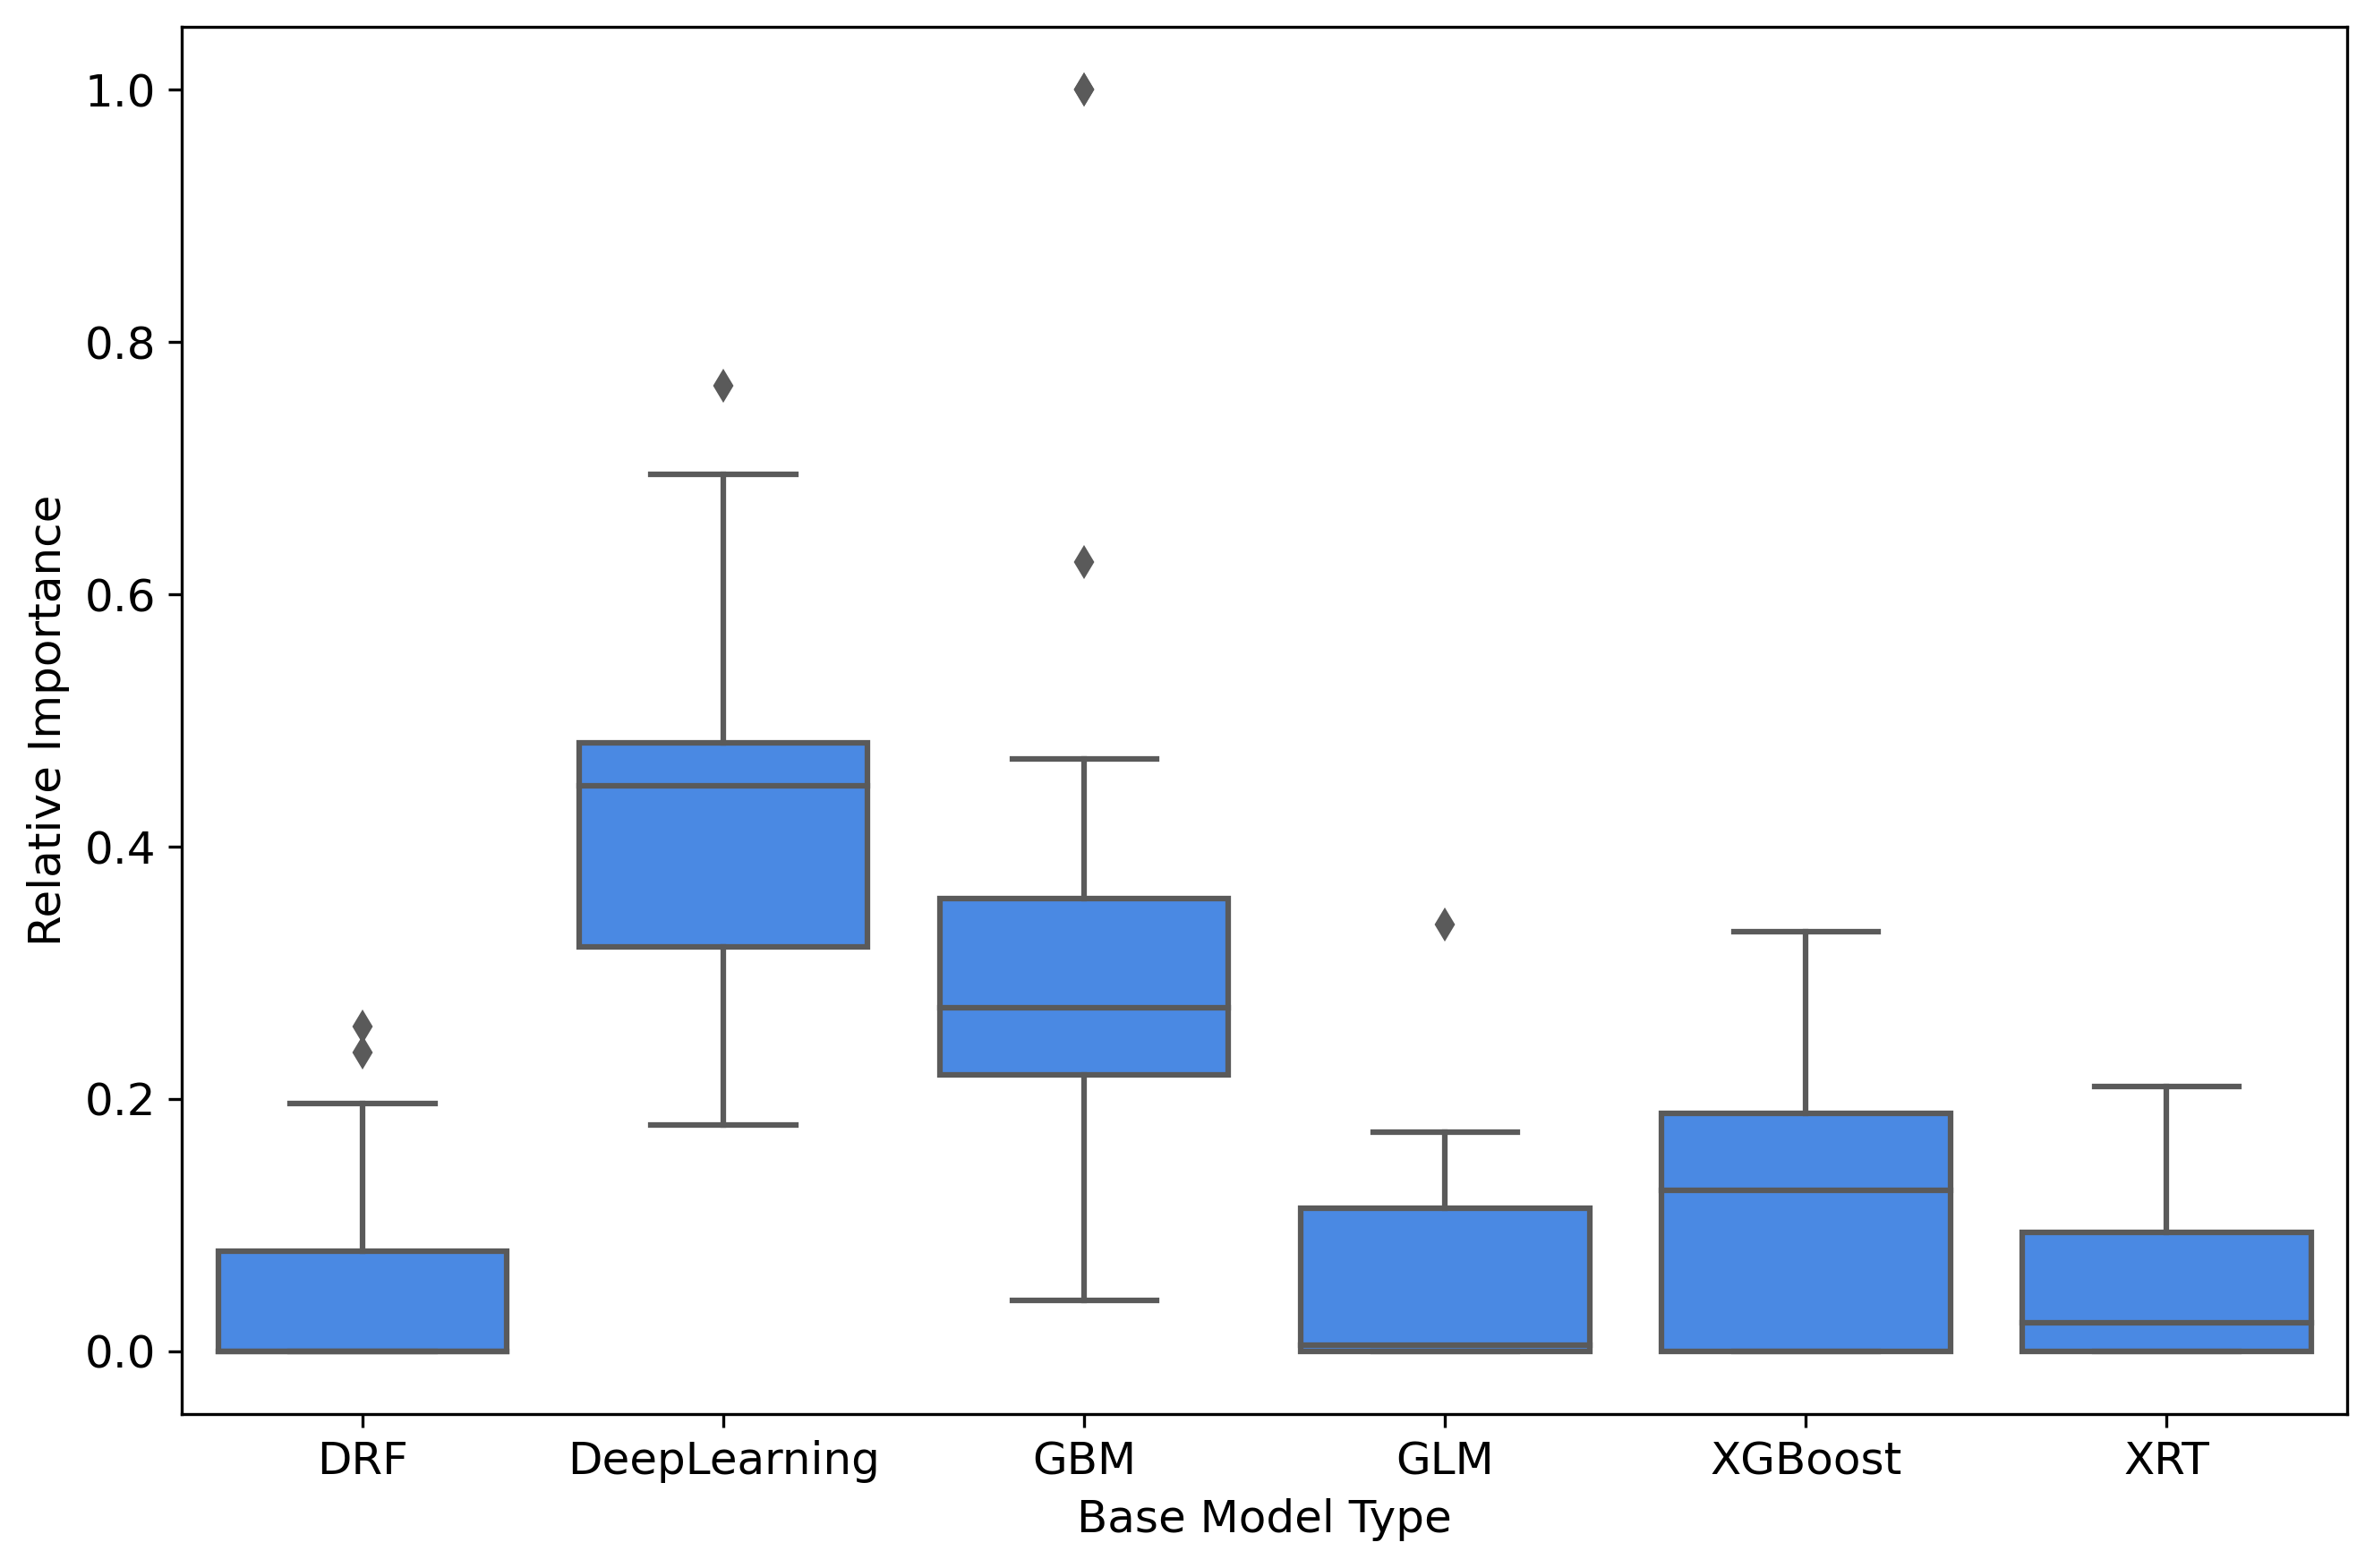

In [8]:
# create saving path
out_path = os.path.join('analysis/benchmark/', exp_id)
if not os.path.isdir(out_path):
    os.makedirs(out_path)

sns.boxplot(data=model_imp, x='base_model_type', y='importance', color=sns.color_palette()[0])
plt.xlabel('Base Model Type')
plt.ylabel('Relative Importance')
plt.tight_layout()
plt.savefig(os.path.join('analysis/benchmark', exp_id, 'base_model_importance.pdf'))